# ハッシュテーブル

In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random
import string

In [2]:
# 素数サンプル: 139, 293, 659, 1423, 3037, 9931, 18439, 103217, 1000171
class MyHash:
    def __init__(self, a, size):
        self.a = a
        self.size = size
        self.table = [None] * size
        self.values = []

    def hash_of(self, string):
        h = 0
        for c in string:
            h = (h * self.a + ord(c)) % self.size
        return h
    
    def add(self, key, value):
        if self.search(key) is None:
            i_new_value = len(self.values)
            self.values.append((key, value, None))
            h = self.hash_of(key)
            i = self.table[h]
            if i is None:
                self.table[h] = i_new_value
            else:
                while i is not None:
                    i_prev = i
                    k, v, i = self.values[i]
                self.values[i_prev] = (k, v, i_new_value)
    
    def search(self, key):
        h = self.hash_of(key)
        i = self.table[h]
        while i is not None:
            k, v, i = self.values[i]
            if k == key:
                return v
        return None

In [3]:
my_hash = MyHash(a=139, size=7)
for s in ['a', 'ab', 'abc', 'abcd', 'abcde', 'b', 'bc', 'bcd', 'a', 'abc']:
    my_hash.add(s, '__{}__'.format(s))

for s in ['a', 'abcd', 'abcde', 'x', 'b', 'bc', 'bcd', 'abd']:
    print('\n# search \'{}\':'.format(s))
    print(my_hash.search(s))


# search 'a':
__a__

# search 'abcd':
__abcd__

# search 'abcde':
__abcde__

# search 'x':
None

# search 'b':
__b__

# search 'bc':
__bc__

# search 'bcd':
__bcd__

# search 'abd':
None


In [4]:
pd.DataFrame(data=my_hash.table, columns=['hash'])

,hash
0,2.0
1,1.0
2,3.0
3,NaN
4,NaN
5,NaN
6,0.0


In [5]:
pd.DataFrame(data=my_hash.values, columns=['key', 'value', 'next index'])

,key,value,next index
0,a,__a__,NaN
1,ab,__ab__,4.0
2,abc,__abc__,5.0
3,abcd,__abcd__,NaN
4,abcde,__abcde__,6.0
5,b,__b__,NaN
6,bc,__bc__,7.0
7,bcd,__bcd__,NaN


In [10]:
STR_SIZE = 5

n_list = []
t_total_list = []
t_ave_list = []
collision_list = []
t_total_list2 = []
t_ave_list2 = []
collision_list2 = []

for n in [int(1000*math.pow(1.2, i)) for i in range(1, 40+1)]:
    my_hash = MyHash(a=18439, size=103217)
    my_hash2 = MyHash(a=18439, size=1000171)
    keys = [''.join(random.choices(string.ascii_letters + string.digits, k=STR_SIZE)) for i in range(n)]
    for i in range(n):
        my_hash.add(keys[i], '__{}__'.format(keys[i]))
        my_hash2.add(keys[i], '__{}__'.format(keys[i]))
    
    start = time.time()
    for key in keys:
        value = my_hash.search(key)
    end = time.time()
    start2 = time.time()
    for key in keys:
        value = my_hash2.search(key)
    end2 = time.time()

    n_list.append(n)
    t_total_list.append(round((end-start), 6))
    t_ave_list.append(round((end-start)*1e6/n, 3))
    t_total_list2.append(round((end2-start2), 6))
    t_ave_list2.append(round((end2-start2)*1e6/n, 3))
    
    c = 0
    for (k, v, i) in my_hash.values:
        if i is not None:
            c += 1
    collision_list.append(c)
    c = 0
    for (k, v, i) in my_hash2.values:
        if i is not None:
            c += 1
    collision_list2.append(c)

In [11]:
pd.DataFrame(data=my_hash.values, columns=['key', 'value', 'next index'])

,key,value,next index
0,MbFEp,__MbFEp__,13407.0
1,gVa4R,__gVa4R__,28077.0
2,3AZ1b,__3AZ1b__,7944.0
3,OYjRX,__OYjRX__,18849.0
4,fCpAN,__fCpAN__,183917.0
...,...,...,...
1468604,KT7xz,__KT7xz__,NaN
1468605,bbjLN,__bbjLN__,NaN
1468606,rU4Gi,__rU4Gi__,NaN
1468607,BNGw4,__BNGw4__,NaN


In [12]:
pd.DataFrame(
    data=np.array([n_list, t_total_list, t_ave_list, collision_list, t_total_list2, t_ave_list2, collision_list2]).T,
    columns=[
        'number of records',
        'total time [s]',
        'average time [$\mu$s]',
        'collision',
        'total time [s] (large table)',
        'average time [$\mu$s] (large table)',
        'collision (large table)'
    ]
)

,number of records,total time [s],average time [$\mu$s],collision,total time [s] (large table),average time [$\mu$s] (large table),collision (large table)
0,1200.0,0.004131,3.443,8.0,0.004611,3.843,0.0
1,1440.0,0.005028,3.492,8.0,0.004914,3.413,2.0
2,1727.0,0.005748,3.328,11.0,0.005701,3.301,2.0
3,2073.0,0.007320,3.531,17.0,0.007042,3.397,2.0
4,2488.0,0.007994,3.213,41.0,0.010669,4.288,3.0
5,2985.0,0.009845,3.298,37.0,0.009892,3.314,2.0
6,3583.0,0.011722,3.272,60.0,0.014374,4.012,4.0
7,4299.0,0.014187,3.300,91.0,0.014441,3.359,17.0
8,5159.0,0.018661,3.617,133.0,0.017696,3.430,9.0
9,6191.0,0.020638,3.334,199.0,0.021114,3.410,26.0


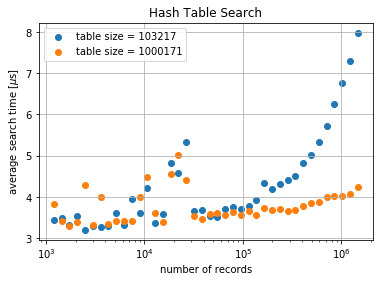

In [13]:
plt.title('Hash Table Search')
plt.xlabel('number of records')
plt.ylabel('average search time [$\mu$s]')
plt.scatter(n_list, t_ave_list, label='table size = 103217')
plt.scatter(n_list, t_ave_list2, label='table size = 1000171')
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()